### 의사결정나무(Decision Tree)

1. 의사결정나무 모형
 - 의사결정나무는 데이터를 분석하여 이들 사이에 존재하는 패턴을 예측가능한 규칙들의 조함으로 나타내며 그 모양이 `나무`와 같다해서 `의사결정나무`라고 불린다. 질문을 던져서 대상을 좁혀나가는 방식의 `스무고개`놀이와 유사한 개념이다.
 - 의사결정나무는 `분류(Classification)`와 `회귀(Regression)` 모두 가능하다. 즉 범주나 연속형수치 모두 예측할 수 있다는 의미이다.
 
2. 의사결정나무의 2가지 기본 아이디어

 - 반복적 분할(Recursive Patitioning)
 
  * 데이터를 두 부분으로 반복해서 잘라 세분화된 영역내에서의 동질성이 최대가 되도록 함
  * 계속 잘라나가다 보면 보는 학습용 데이터를 100%정확하게 분류해 낼 수 있을 만큼 세분화할 수 있다. 
  * 너무 자세하게 분류해서 시간이 많이 걸리거나 과적합화 즉, 과저자료는 잘 맞추지만 미래(예측)데이터는 못 맞추는 경우가 발생하게 된다. 따라서 불필요한 자료들을 가지치기가 필요하게 된다. 
 
 - 분류나무의 가지치기(Pruning the tree)
 
  * 상기에서 설명한 반복적 분할을 반복하다 보면 과적합화는 피할 수 없이 나타나게 된다.
  * 과적합화를 피하기 위해서는 불필요한 가지(정보제공이 그리 많지 않은 가지)를 제거함으로써 나무를 단순화하는 작업이 이루어지게 된다.
 
3. 반복적 분할의 예

 - 수입과 주택크기의 상관관계
 
  * 첫 번째 분할 : 주택크기가 19,000
  * 두 번쨰 분할 : 수입이 84,000
  * 계속해서 반복적인 분할을 tree구조로 분할
  
4. 단점 : 과적합화 문제

 - 인공신경망에서의 다른 기계학습과 동일한 문제 발생(과적합화)
 - 과적합해소방법
  * 카이제곱(Chai, chi-squared automatic interaction detection) : 카이제곱검정을 적용해서 적당한 수준에서 나무의 분할(성장)을 중단 시키는 방법
  * CART : 일단 나무를 최대한으로 분할(성단)시킨 후에 가지치기를 수행해서 학습용 데이터로 나무를 분할(성정)시키고 검증용데이터로 가지치기를 수행

5. 실습(붓꽃품종의 종류)

    머신러닝예제에는 항상 나옴, 붓꽃의 꽃임(petal)과 꽃받침(sepal)의 폭과 길이를
    측정하여 품종을 예측하는 예제
    
    붓꽃의 품종으 150여종류 이상이 있고 크게 3가지로 분류됨(setosa, versicolor,
    vifcinica). 어떤 품종인지 구분해 놓은 측정 데이터를 이용하여 새로 채집한
    붓꽃의 품종을 예측하는 머신러닝 모델을 만드는 것이 목표

##### graphiviz 설치


* 다운로드 : https://graphviz.gitlab.io/_pages/Download/Download_windows.html
* 프로그램도 같이 필수로 설치해줘야함
* 설치 : pip install graphviz
* 패스설치 : graphviz\bin, bin\dot.exe 를 패스로 지정

In [1]:
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import graphviz
import mglearn

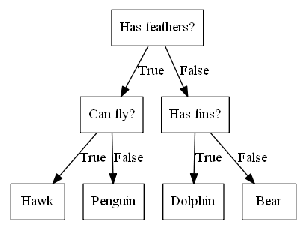

In [3]:
mglearn.plots.plot_animal_tree()

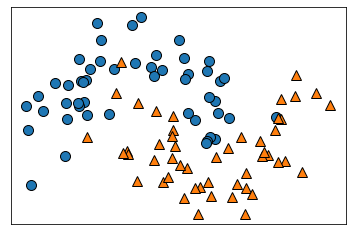

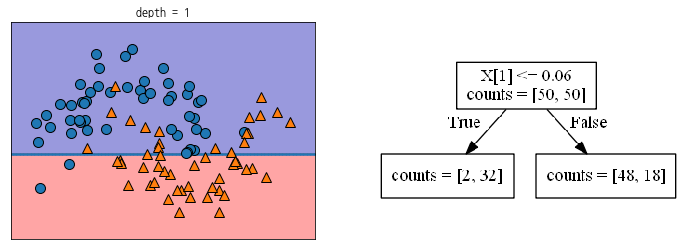

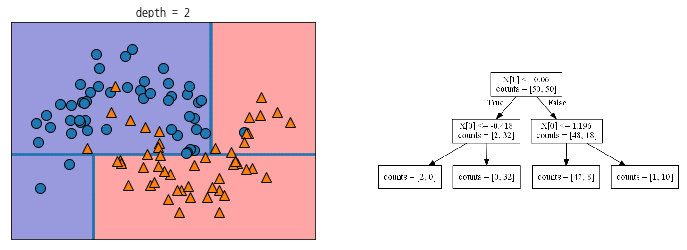

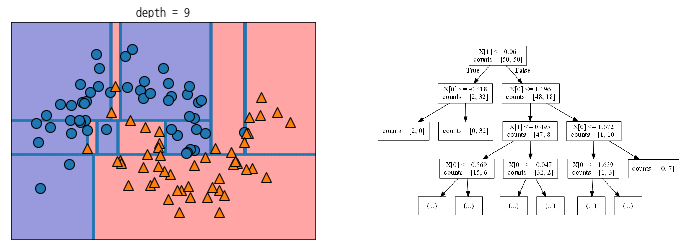

In [4]:
mglearn.plots.plot_tree_progressive()


# 루트노드인 첫번째는 x[1] =0.06에서 수평으로 분할된 것이 가장 많은 데이터를 분류
# 즉, 0.06에서 분류가 일어나 왼쪽 노드는 0=2개, 1=32개, 오른쪽 노드는 0=48개, 1=18개로
# 분류. 왼쪽그래프는 수평선아래를 의미, 오른 쪽은 위를 표시한다.

##### 결정트리의 복잡도 제어하기

일반적으로 트리로 훈련된 모델은 100% 정확하게 맞출 수 있는데 이 의미는 과대적합이 된다는 의미이다. 이 과대적합을 막는 두가지 방법은 트리 생성을 일찍 중단하는 `사전가지치기`, 트리를 전부 완성한 후 데이터의 변화가 적은 지점을 제거하는 `사후가지치기`가 있다.

사전가지치기 방법은 트리의 최대 길이나 리프의 최대갯수, 노드 분할의 포인트의 최소갯수를 제한한다.

##### 유방암예측실습




In [35]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
print(cancer.keys())

from sklearn.tree import DecisionTreeClassifier

# sklearn.tree 에서는 DecisionTreeClassifier, DecisionTreeRegressor 만 지원을 해주며
# 그 중에서도 복잡성을 완화하기 위해서 사전 가지치기만 지원해준다.
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print(tree.score(X_train, y_train))

print(tree.score(X_test, y_test))



dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
1.0
0.9370629370629371


In [68]:
tree = DecisionTreeClassifier(random_state=0, max_depth = 5, min_impurity_decrease=0.0001)
tree.fit(X_train, y_train)

print(tree.score(X_train, y_train))

print(tree.score(X_test, y_test))

0.9953051643192489
0.951048951048951


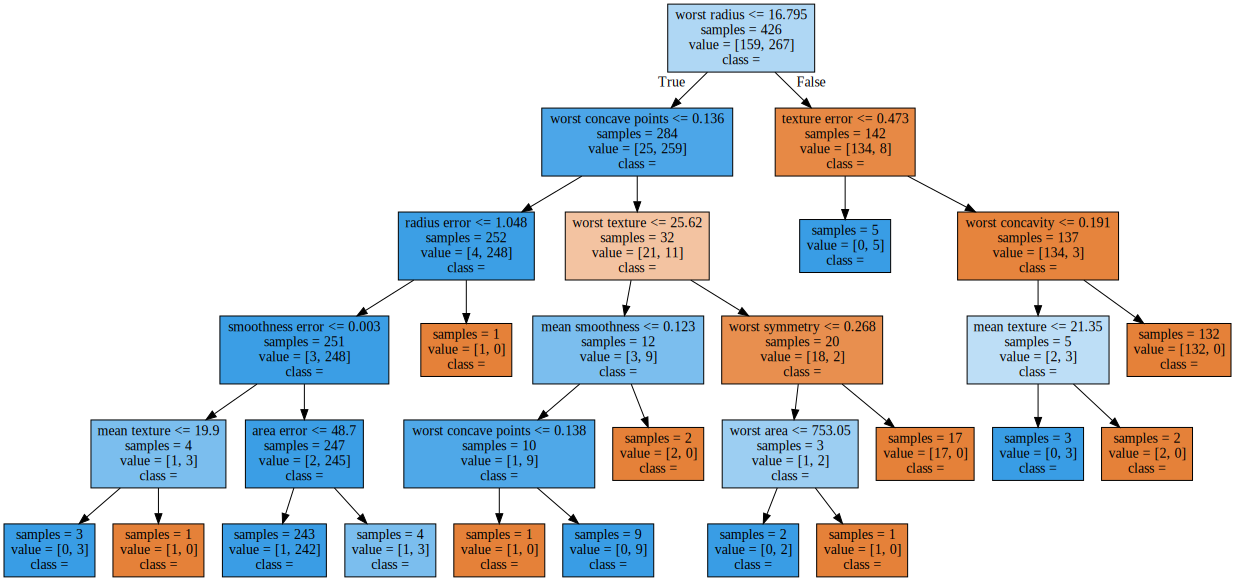

In [73]:
# 의사결정나무의 그래프 저장하기
# 트리모듈의 export_graphviz 함수를 이용한 시각화

from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = 'tree.dot', class_names = ['음성','양성'],
               feature_names=cancer.feature_names, impurity=False, filled=True )

with open('tree.dot', encoding = 'utf-8') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))
    



##### 트리의 특성 중요도

전체트리가 보는 것이 어려울 수 있기 때문에 대신 트리가 어떻게 동작하는지 요약하는 속성들을
사용할 수가 있는데 가정 널리 사용되는 속성은 트리를 만드는 결정에 각각의 특성들이 얼마나 중요한지를 평가하는 `특성중요도 (feature importance)`이다.

이 값은 0과 1사이의 값으로 각 특성에 대해 0은 전혀 사용하지 않았다는 뜻이고 1은 완벽하게 타겟클래스를 예측했다는 의미이다. 특성 중요도의 전체 합은 1이다.

In [86]:
print('특성 중요도')
for i in range(len(tree.feature_importances_)):
    print('{2}. {0}: {1}'.format(cancer.feature_names[i],tree.feature_importances_[i],(i+1)))


특성 중요도
1. mean radius: 0.0
2. mean texture: 0.019916443919022617
3. mean perimeter: 0.0
4. mean area: 0.0
5. mean smoothness: 0.013788307328554116
6. mean compactness: 0.0
7. mean concavity: 0.0
8. mean concave points: 0.0
9. mean symmetry: 0.0
10. mean fractal dimension: 0.0
11. radius error: 0.00993130422385004
12. texture error: 0.04713547368940933
13. perimeter error: 0.0
14. area error: 0.002430019563875923
15. smoothness error: 0.002352568741122854
16. compactness error: 0.0
17. concavity error: 0.0
18. concave points error: 0.0
19. symmetry error: 0.0
20. fractal dimension error: 0.0
21. worst radius: 0.7078645100363347
22. worst texture: 0.032364221368411744
23. worst perimeter: 0.0
24. worst area: 0.006809040656076107
25. worst smoothness: 0.0
26. worst compactness: 0.0
27. worst concavity: 0.01771344591113525
28. worst concave points: 0.12811929544687797
29. worst symmetry: 0.011575369115329387
30. worst fractal dimension: 0.0


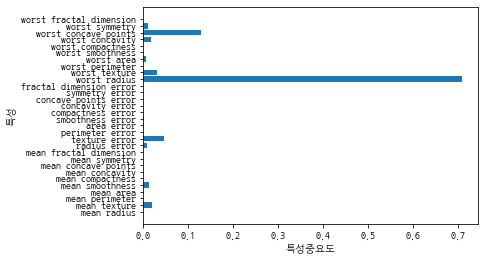

In [93]:
# 특성 중요도 시각화
def plot_feature_importances_canser(model):
    n_features = len(cancer.feature_names)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('특성중요도')
    plt.ylabel('특성')
    
plot_feature_importances_canser(tree)

###### 특성과 클래스사이의 관계 살펴보기

Feature importances: [0. 1.]


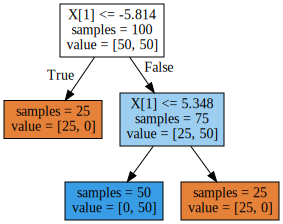

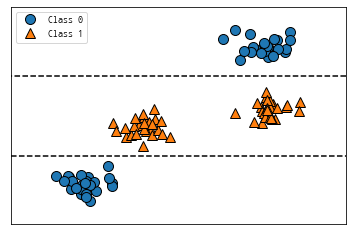

In [95]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

# 결과분석
# X[1]에 있는 자료 즉, 특성=1만 사용되었고 0은 전혀 사용되지 않았지만 그래프의 결정경계
# 에서 볼수 있듯이 특성 1의 값이 높으면 클래스 0 또는 1이라 말할수가 없다.

##### 실습 2 : 아이리스 품종분류

In [111]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
# sklearn.preprocessing StandardScaler를 통해서 아이리스 데이터를 정규화
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [118]:
# 예측하려는 품종명

print('타킷 이름 {}'.format(iris.target_names))

# 특성
print('특성 {}'.format(iris.feature_names))

# 데이터의 크기
print('크기 {}'.format(iris.data.shape))

print('첫행 {}'.format(iris.data[:5]))


타킷 이름 ['setosa' 'versicolor' 'virginica']
특성 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
크기 (150, 4)
첫행 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [134]:
# 모든 행의 2열과 3열만 선택
x = iris.data[:,[2,3]]
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state=0)

# 데이터 표준화작업(아이리스의 넓이, 길이값을 0 ~ 1 사이 값으로 표준화(z))
# 전처리기능 -> 스케일링
# 스케일은 자료 집합에 적용되는 전처리과정으로 모든 자료에 선형변환을 적용하며
# 전체 자료의 분포를 평균 0, 분산 1이 되도록 만드는 과정이다.

sc = StandardScaler()
sc.fit(x_train)
sc.fit(x_test)
# 표준화 데이터셋 생성
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)


In [175]:
from sklearn.tree import DecisionTreeClassifier

# 트리모델 생성
tree = DecisionTreeClassifier(random_state=1, max_depth = 3, min_impurity_decrease=0.0001)
tree.fit(x_train, y_train)
print(tree.score(x_train, y_train))
print(tree.score(x_test, y_test))

0.9809523809523809
0.9777777777777777


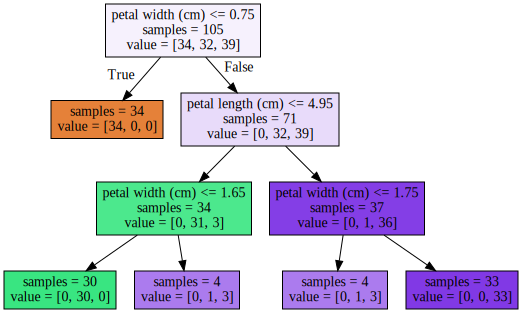

In [176]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = 'tree1.dot',
               feature_names=['petal length (cm)',
                 'petal width (cm)'], impurity=False, filled=True )

with open('tree1.dot', encoding = 'utf-8') as f:
    dot_graph = f.read()
    
    
display(graphviz.Source(dot_graph))
    

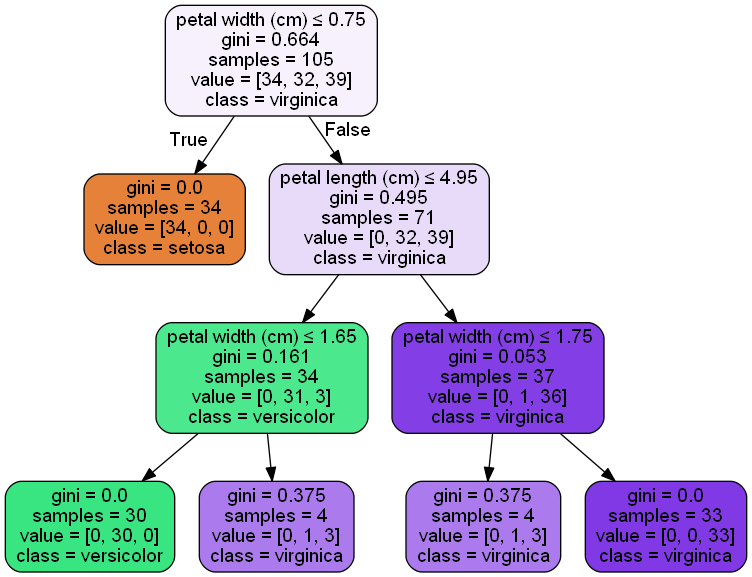

In [177]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import pydotplus
# pip install pydotplus

dot_data = export_graphviz(tree, feature_names=['petal length (cm)',
                 'petal width (cm)'], class_names=iris.target_names, filled= True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

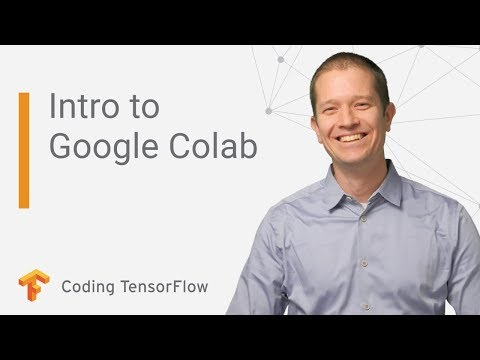

In [178]:
from IPython.display import YouTubeVideo
YouTubeVideo('inN8seMm7UI',width = 400, height = 400)

###### 결정트리의 앙상블

`앙상블 Ensemble`은 여러 머신러닝모델을 연결하여 좀 더 강력한 모델을 만드는 기법이다.
머신러닝에는 분류와 회귀분석의 다양한 데이터셋에서 효과적이라고 한다.

`랜덤포레스트 Random Forest`와 `그래디언트 부스팅 gradient boosting`결정트리는 둘다 모델을 구성하는 기본요소로 결정트리를 사용한다.

###### 랜덤포레스트(RandomForest)

의사결정나무의 단점은 과거데이터는 잘 맞추지만 새로운 데이터에 대한 예측력이 약하다는 것이다. 이 과적합화를 방지하는 방법으로 `랜덤포레스트(RandomForest)`가 있다.


`Random Forest`는 배깅을 통해서 여러개의 트리를 만든 다음 수치를 계산한다. 결과값의 평균, 혹은 과반수의 결과값을 통해서 적합한 트리를 선택하게 된다. 이런 결과값을 합치는 과정을 앙상블이라고 한다.

렌덤포레스트는 기본적으로 조금씩 다른 여러개의 결정트리의 묶음이다. 램덤포레스트를 만들려면 생성할 트리의 갯수를 정해야 한다.(RandomForestRegressor이나 RandomForestClassifier의 n_stimators매개변수)알고리즘은 각 트리가 고유하게 만들어지도록 무작위 선택을 하는데 트리를 만들기 위해서 먼저 데이터의 `부트스트랩 샘픔 bootstrap sample`을 생성한다. 다시말해 n_samples횟수 만큼 추출한다(한 샘플이 여러번 중복추출될 수 있다)선택된 후보들 중에서 최선의 테스트를 찾고 몇개의 특성을 고를지는 max_features매개변수로 조정한다.

In [233]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

forest = RandomForestClassifier(n_estimators=100, random_state=0, max_depth = 3, min_impurity_decrease=0.0001)
forest.fit(X_train, y_train)
print('훈련세트점수: {:.3f}'.format(forest.score(X_train, y_train)))
print('검증세트점수: {:.3f}'.format(forest.score(X_test, y_test)))

훈련세트점수: 0.977
검증세트점수: 0.951


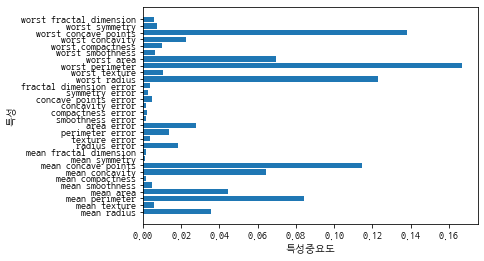

In [234]:
# 분석결과를 시각화
plot_feature_importances_canser(forest)

# 결과분석
# RandomForest는 아무런 매개변수의 튜닝이 없이도 선형모델 또는 단일 결정트리보다 높은
# 96%의 정확도를 내고 있다. 랜덤포레스트는 단일결정트리처럼 max_features갑을 조정하거나
# 사전가지치기를 할 수 있다.

In [264]:
x = iris.data

x_train, x_test, y_train, y_test = train_test_split(x, iris.target, stratify=iris.target, random_state=42)

In [265]:
sc = StandardScaler()
sc.fit(x_train)
sc.fit(x_test)
# 표준화 데이터셋 생성
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [267]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(x_train_std, y_train)
print('훈련세트점수: {:.3f}'.format(forest.score(x_train_std, y_train)))
print('검증세트점수: {:.3f}'.format(forest.score(x_test_std, y_test)))

# 위에서 안했던 'sepal length (cm)','sepal width (cm)'를 사용했을 시에는 test 점수가 60%로 나옴
#'sepal width (cm)','petal length (cm)'의 조합은87%
#'petal length (cm)','petal width (cm)'의 조합은 94%가 나옴
# 기본적으로 중요도가 높게 책정된 항목을 사용할 시 정확도가 높아지게 나옴

훈련세트점수: 1.000
검증세트점수: 0.895


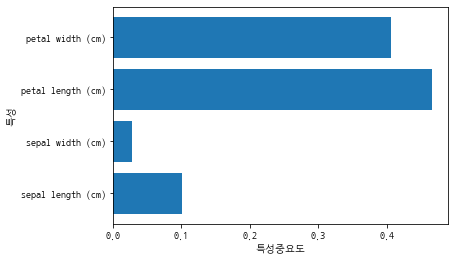

In [269]:
plot_feature_importances_iris(forest)

In [268]:
def plot_feature_importances_iris(model):
    n_features = 4
    plt.barh(range(4),model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris.feature_names)
    plt.xlabel('특성중요도')
    plt.ylabel('특성')

In [284]:
# make_moons를 가지고 트리 5개로 구성된 랜덤포레스트 모델을 생성

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2).fit(X_train, y_train)
print('훈련세트점수: {:.3f}'.format(forest.score(X_train, y_train)))
print('검증세트점수: {:.3f}'.format(forest.score(X_test, y_test)))


훈련세트점수: 0.960
검증세트점수: 0.920


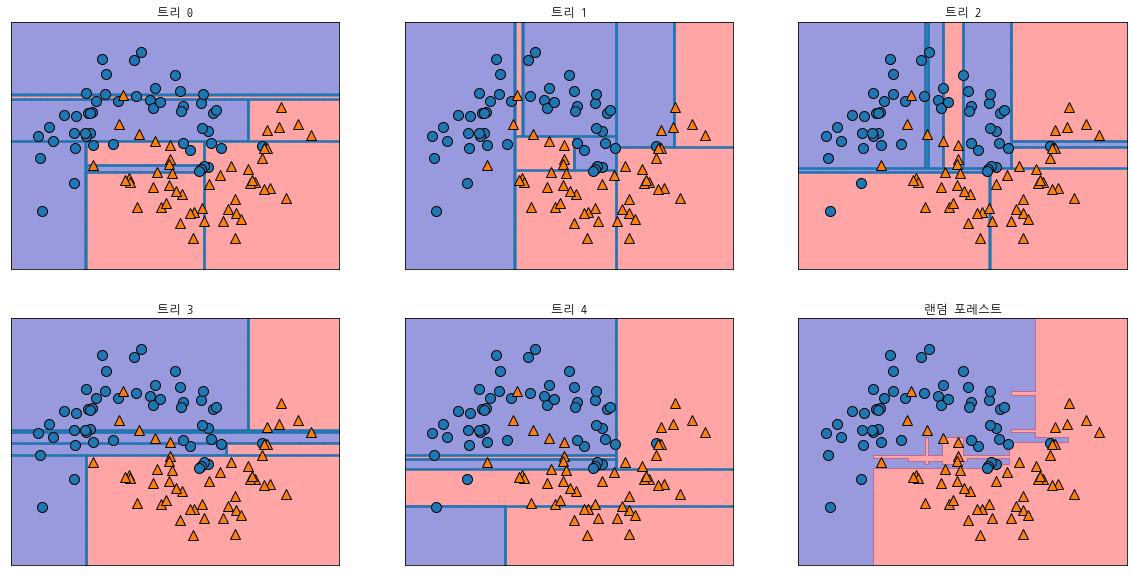

In [287]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
# ax에는 그래프가 들어갈 위치를 지정  axes[2,3]
# 마지막 그래프는 앞의 5개의 배깅한 그래프를 투표 혹은 평균을 내어서 만들어낸 그래프
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# 결과분석
# 다섯개의 트리가 만든 결정경계는 다른 형태를 가지며 부트스트랩 샘플링 때문에 한쪽 트리에
# 나타나는 훈련포인트가 다른 트리에는 포함되지 않을 수 있어 각 트리는 불완전하다.
# 랜덤포레스트 개개의 트리보다는 덜 과대접합되고 훨씬 좋은 결정경계를 만들어 준다.
# 실제 애플리케이션에서는 매우 많은 트리를 사용하기 때문에 더 부드러운 결정경계가 만들어 진다.

In [291]:
forest.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1872583848, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=794921487, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, m

###### 장단점과 매개변수

회귀와 분류에 있어서 랜덤포레스트는 현재 가장 널리 사용되는 머신러닝 알고리즘이다. 랜덤포레스트는 성능이 매우 뛰어나고 매개변수 튜닝을 많이 하지 않아도 잘 작동하며 테이터의 스케일을 맞출 필요가 없다. 대량의 데이터셋에서 랜덤포레스트 모델을 만들면 다소 시간이 걸릴 수 있지만
CPU코어가 많다면 손쉽게 병렬처리를 할 수 있다.

멀티프로세서일 때는 n_jobs매개변수를 이용하여 사용할 CPU코어수를 지정할 수 있다. 하지만 n_jobs매개변수를 코어갯수보다 크게 지정하는 것은 별로 도임이 되지 않는다. n_jobs=-1로 지정하면 컴퓨터의 모든 코어를 사용한다.

유의할 점은 랜덤포레스트는 말 그대로 랜덤하다. random_state를 지정하여 동일 결과가 나오도록 고정해야 한다.

###### 중요한 매개변수

>* n_stimators : 트리의 갯수. 이 값은 클수록 좋다. 더 많은 트리를 평균하면 과대적합을 줄여서 보다 안정적인 모델을 만든다.
* max_features : 각 트리가 얼마나 무작위하게 될 지를 결정하면 값이 작으면 작을 수록 과대적합을 줄여준다. 일반적으로 기본값을 쓰는 것이 좋다.
 - 분류는 max_features=sqrt(n_features)
 - 회귀는 max_features=n_features
* max_depth : 가지치기횟수

###### 실습 3. 독버섯(랜덤포레스트)

* 버섯데이터 : 독버섯여부, 첫번째컬럼 : 독버섯여부(독이 있으면 p, 독이 없으면 e)
* 자료의 특성 : https://archive.ics.uci.edu/ml/datasets/mushroom
* 머쉬롬 데이터 : https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/mushrooms.csv

In [294]:
mr = pd.read_csv('../data/ml/mushroom/mushroom.csv')
mr.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [317]:
# 데이터 내부의 기호를 숫자로 변환
label = []
data= []
a = []
    
for row_index, row in mr.iterrows():
    # mr.iterrows는 데이터프레임을 튜플화하는 것 같은
    # 튜플로 변환된 row는 series로 불러와서 데이터프레임과 불러오는 방식이 달라짐
    # enumer 과 같이 앞에는 숫자 뒤에는 데이터가 들어가는 형식인듯
    label.append(row.loc['p']) # 독버섯 여부(p가 독, e 는 eatable)
    row_data = []
    
    for v in row.iloc[1:]:
        # 문자를 수치로 변환
        row_data.append(ord(v))
    data.append(row_data)
print(label[:5])
    

['e', 'e', 'p', 'e', 'e']


In [321]:
# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(data, label)

# 기계학습
clf = RandomForestClassifier().fit(X_train, y_train)

# 데이터예측
predict = clf.predict(X_test)

# 결과출력
print('훈련세트점수: {:.3f}'.format(clf.score(X_train, y_train)))
print('검증세트점수: {:.3f}'.format(clf.score(X_test, y_test)))

# 결과검증자료
from sklearn import metrics

as_score = metrics.accuracy_score(y_test,predict)
cl_report = metrics.classification_report(y_test, predict)
print('정답률 :',as_score)
print('보고서',cl_report)

훈련세트점수: 1.000
검증세트점수: 1.000
정답률 : 1.0
보고서               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1054
           p       1.00      1.00      1.00       977

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



##### 2. 그래디언트 부스팅(gradient boosting)

`그래디언트부스팅회귀트리`는 여러개의 결정트리를 묶어 강력한 모델을 만드는 또는 앙상블방법이다. 이름이 회귀이지만 회귀와 분류 모두에 사용할 수 있다. 랜덤포레스트와는 달리 이전 트리의 오차를 보완하는 방법으로 `순차적으로 트리를 만든다.`
기본적으로 그래디언트부스팅회귀트리는 `무작위성이 없다.` 대신 강력한 `사전가지치기`가 사용된다.

이 방법은 보통 하나에서 다섯정도의 깊지 않은 트리를 사용함으로 메모리를 적게 사용하고 예측도 빠르다. 이 모델의 근본 아이디어는 이런 앝은 트리같은 모델(`약한 학습기 weak learner`라고 한다.)을 많이 연결하는 것이다. 각각의 트리는 데이터의 일부에 대해서만 예측을 잘 수행할 수 있어 트리가 많이 추가될 수록 성능이 좋아 진다.

랜덤포레스트보다는 매개변수 설정에 조금 더 민감하지만 잘 조정하면 더 높은 정확도를 얻을 수 있다. 앙상블방식에 있는 사전가지치기나 트리갯수제한등 이외에도 그래디언트 부스팅에서 중요한 매개변수는 이전 트리의 오차를 얼마나 강하게 보정할 것인지를 제어하는 `학습률 learning rate`이다. 학습률이 크면 트리는 보정을 강하게 하기 때문에 복잡한 모델을 만든다. n_estimators값을 키우면 앙상블에 트리가 더 많이 추가되어 모델의 복잡도가 커지고 훈련세트에서의 실수를 바로 잡을 기회가 더 많아 진다.

In [330]:
# 유방암세트를 이용해서 Gradient boosting classfiet를 사용
# 기본값 depth = 3인 트리 100개 학습률 0.1로 설정

from sklearn.ensemble import GradientBoostingClassifier

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

gb = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

print('훈련세트점수: {:.3f}'.format(gb.score(X_train, y_train)))
print('검증세트점수: {:.3f}'.format(gb.score(X_test, y_test)))

# 훈련결과

# 훈련세트의 정확도가 100%이므로 과대적합된 것 같아서 이를 방지하기 위해 트리의 최대깊이를
# 줄여 사전가지치기를 강하게 하거나 학습률을 낮출 수 있다.
# 이 두 방식은 모델의 복잡도를 감소시켜 훈련세트의 정확도를 좀 낮출 수 있다.

훈련세트점수: 0.988
검증세트점수: 0.937


In [333]:
gb = GradientBoostingClassifier(random_state=0,max_depth= 3).fit(X_train, y_train)

print('훈련세트점수: {:.3f}'.format(gb.score(X_train, y_train)))
print('검증세트점수: {:.3f}'.format(gb.score(X_test, y_test)))

훈련세트점수: 1.000
검증세트점수: 0.958


In [334]:
# learning_rate = 경사하강법의 rate비율을 말하는듯
gb = GradientBoostingClassifier(random_state=0, learning_rate=0.01).fit(X_train, y_train)

print('훈련세트점수: {:.3f}'.format(gb.score(X_train, y_train)))
print('검증세트점수: {:.3f}'.format(gb.score(X_test, y_test)))

훈련세트점수: 0.988
검증세트점수: 0.937


###### 장단점과 매개변수

그래디언트 부스팅 결정트리는 지도학습에서 가장 강력하고 널리 사용되는 모델중 하나이지만 
단점은 매개변수를 잘 조정해야 한다는 것과 훈련시간이 길다는 것이다.

다른 트리기반 모델처럼 특성의 스케일을 조정하지 않아도 되고 이전 특성이 연속적인 특성에서도
잘 동작한다. 그리고 트리기반 모델의 특성상 희소성 고차원 데이터에는 잘 작동하지 않는다.


###### 중요한 매개변수

>* n_estimators
* learning_rate : 이전 트리와의 차이를 보정하는 정도를 조절, 작게 입력할 수록 더 정확
* 상기 두 매개변수는 매우 깊이 연관되며 learning_rate를 낮추면 비슷한 복잡도의 모델을 만들기 위해서는 더 많은 트리를 추가해야 한다.

* n_estimators가 클수록 좋은 랜덤포레스트와는 달리 그래디언트 부스팅에서는 이 값을 크게하면모델이 복잡해지고 과대적합될 가능성이 높아 진다.

* max_depth(or max_leaf_nodes)